In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# to show this , i'll use word cloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")
#Show the the count of rows and columns
df.shape

(2224, 11)

In [5]:
# check the null values , as we can see there is no missing values. 
df.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [7]:
# extract the year, month and day and put it in new column 
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year,Month,Day
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,4,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,4,8
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,5,7
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015,4,2
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015,6,2
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015,6,9
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015,6,23


In [8]:
# make a copy of the data 
df_copy = df.copy()

In [193]:
# we can see we have 3 months so , we can look at it one by one 
df_copy["Month"].value_counts()

6    1280
4     545
5     399
Name: Month, dtype: int64

In [198]:
# Group by my month and day and check the number of complaints
df_month = df_copy.groupby(["Day" , "Month"]).Day.count().reset_index(name ='Count')
df_month

,Day,Month,Count
0,1,4,18
1,1,5,12
2,1,6,25
3,2,4,27
4,2,5,7
...,...,...,...
86,29,6,51
87,30,4,24
88,30,5,9
89,30,6,53


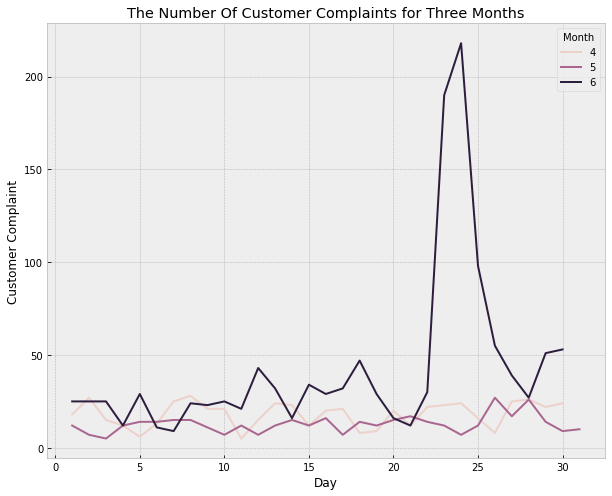

In [201]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels.
# as we can see here on June we have a huge number of Complaints 
# and the peak number is between 20th to 25th of June
fig = plt.figure(figsize=(10,8))
plt.style.use("bmh")

sns.lineplot(
    data=df_month,
    x = "Day",
    y = "Count",
    hue = "Month"# The number of each day 
)

plt.title("The Number Of Customer Complaints for Three Months")
plt.xlabel("Day") # x axis label
plt.ylabel("Customer Complaint") # y axis label
plt.show()

In [280]:
#- Provide a table with the frequency of complaint types.
# make a new df to store all the complaint types.
df_complaints = df_copy.groupby(["Customer Complaint"])["Customer Complaint"]\
.count().sort_values(ascending=False).reset_index(name ='Count')
# Here we can see the top with a table , but i'll perform that with word cloud 
# to be much clearer
df_complaints

,Customer Complaint,Count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,Lack of availability,1
1837,Lack of communication and poor customer service,1
1838,Lack of consistent service,1
1839,Lack of internet speed,1


In [281]:
# make them in a list 
complaints_list = df_copy['Customer Complaint'].tolist()
# uncomment the comment down to see them 
#complaints_list #
# join the list to use in the word cloud 
complaints_list =''.join(complaints_list)


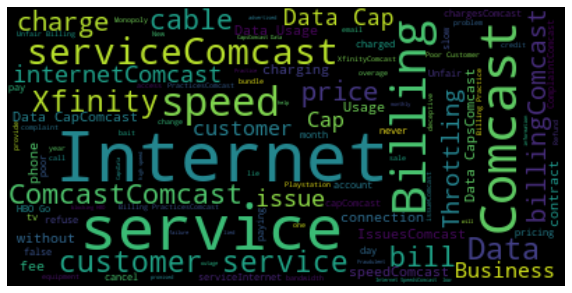

In [305]:
# Here make the Word Cloud figure 
# As we can see the three big fonts are Internet , Service and Billing 
wordcloud = WordCloud(background_color='black',
                      max_font_size=50, 
                      max_words=100,
                     ).generate(complaints_list)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.show()

In [318]:
# here we make a new column which have categorical variable with value as Open and Closed. 
# Open & Pending -> Open 
# Closed & Solved -> Closed 
df_copy["Status"].value_counts()


Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [332]:
# here to make the list with the condition.
final_status_list = []
for i in range(len(df_copy)):
    if (df_copy.loc[i,"Status"] == "Closed") | (df_copy.loc[i,"Status"] == "Solved"):
        final_status_list.append("Closed")
    else :
        final_status_list.append("Open")

In [334]:
# make the new column 
df_copy["final_status"] = final_status_list
df_copy

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Year,Month,Day,final_status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,4,22,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,4,8,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,4,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,5,7,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,5,26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015,4,2,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015,6,2,Closed
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015,6,9,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015,6,23,Closed


In [438]:
#Provide state wise status of complaints in a stacked bar chart with the final_status
# make state df . 
df_state = df_copy.groupby(["State" , "final_status"])["State"]\
.count().sort_values(ascending=False).reset_index(name ='Count')
df_state

,State,final_status,Count
0,Georgia,Closed,208
1,Florida,Closed,201
2,California,Closed,159
3,Illinois,Closed,135
4,Pennsylvania,Closed,110
...,...,...,...
72,Kansas,Closed,1
73,Iowa,Closed,1
74,Montana,Closed,1
75,District of Columbia,Closed,1


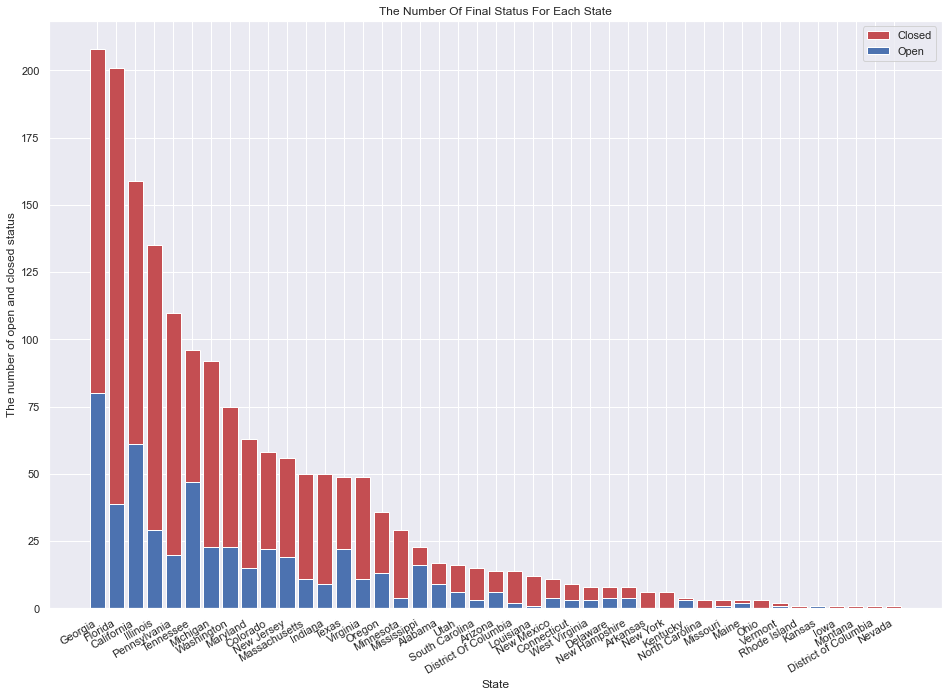

In [440]:
# we can see Georgia is the moset closed with final_status then Florida
# Also, Georgia is the most open then California.
# we can see some State has open final_status more than closed which is a big trouble. that will affect the 
# company reputation 
closed_df = df_state[df_state["final_status"] == "Closed"]
open_df = df_state[df_state["final_status"] == "Open"]
fig = plt.figure(figsize=(16,12))

plt.bar(closed_df["State"], closed_df["Count"] , color='r')
plt.bar(open_df["State"], open_df["Count"], color='b')
plt.legend(["Closed", "Open"])

fig.autofmt_xdate()

plt.title("The Number Of Final Status For Each State")
plt.xlabel("State") # x axis label
plt.ylabel("The number of open and closed status") # y axis label
plt.show()

In [453]:
#Which state has the highest percentage of unresolved complaints
highest_p = df_copy.groupby(["State","final_status"]).size().unstack()
# fill the NA 
highest_p.fillna(0)

final_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [461]:
# Georgia has the most unresolved complaints
highest_p.sort_values('Open',ascending=False).head(1)

final_status,Closed,Open
State,,
Georgia,208.0,80.0


In [470]:
#Georgia percentage of unresolved complaints with 15%
(highest_p['Open']/highest_p['Open'].sum()*100).sort_values(ascending=False).fillna(0)


State
Georgia                 15.473888
California              11.798839
Tennessee                9.090909
Florida                  7.543520
Illinois                 5.609284
Michigan                 4.448743
Washington               4.448743
Colorado                 4.255319
Texas                    4.255319
Pennsylvania             3.868472
New Jersey               3.675048
Mississippi              3.094778
Maryland                 2.901354
Oregon                   2.514507
Virginia                 2.127660
Massachusetts            2.127660
Indiana                  1.740812
Alabama                  1.740812
Utah                     1.160542
Arizona                  1.160542
Minnesota                0.773694
New Hampshire            0.773694
New Mexico               0.773694
Delaware                 0.773694
Kentucky                 0.580271
South Carolina           0.580271
Connecticut              0.580271
West Virginia            0.580271
Maine                    0.386847
District

In [469]:
#Georgia has the most solved complaints
highest_p.sort_values('Closed',ascending=False).head(1)

final_status,Closed,Open
State,,
Georgia,208.0,80.0


In [471]:
#Georgia has the most solved complaints with 12%
(highest_p['Closed']/highest_p['Closed'].sum()*100).sort_values(ascending=False).fillna(0)

State
Georgia                 12.185120
Florida                 11.775044
California               9.314587
Illinois                 7.908612
Pennsylvania             6.444054
Tennessee                5.623902
Michigan                 5.389572
Washington               4.393673
Maryland                 3.690685
Colorado                 3.397774
New Jersey               3.280609
Indiana                  2.929115
Massachusetts            2.929115
Texas                    2.870533
Virginia                 2.870533
Oregon                   2.108963
Minnesota                1.698887
Mississippi              1.347393
Alabama                  0.995899
Utah                     0.937317
South Carolina           0.878735
Arizona                  0.820152
District Of Columbia     0.820152
Louisiana                0.702988
New Mexico               0.644405
Connecticut              0.527241
West Virginia            0.468658
New Hampshire            0.468658
Delaware                 0.468658
New York

In [472]:
#percentage of complaints resolved till date, which were received through the Internet and customer care calls
resolved_p = df_copy.groupby(["Received Via","final_status"]).size().unstack()
# fill the NA 
resolved_p.fillna(0)


final_status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [473]:
# we can see the most closed from Customer Care Call with 50.6% but not a big different with the 
#other value 
(resolved_p['Closed']/resolved_p['Closed'].sum()*100).sort_values(ascending=False).fillna(0)

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: Closed, dtype: float64